## Carbon Emissions Data Cleansing and Exploration

Exec Summary Will go here:

In [184]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import math
%matplotlib inline

In [185]:
df = pd.read_csv('predicting_carbon_emissions_cleaned.csv')
pd.set_option('display.max_columns', None)
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [186]:
df = df.rename(columns = {'Carbon_Emission__tCO2e/mmUSD':'Carbon'})

In [216]:
df.drop(df[df['Carbon']>3000].index, inplace = True)
df.drop(df[df['Carbon'] == 0].index, inplace = True)

In [188]:
df.head(3)

,Unnamed:_0,Company_Name,Listed,HQ_Country,GICS_Sector,Accounting_Year_End,Reported_Scope_1_tCO2e,Estimated_Scope_1_tCO2e,Scope_1_source,Scope_1_quality_flag,Reported_market-based_Scope_2_tCO2e,Note,Reported_location-based_Scope_2_tCO2e,Estimated_location-based_Scope_2_tCO2e,Location-based_Scope_2_source,Location-based_Scope_2_quality_flag,Scope_2_company_comments,GHG_revenue_intensity_tCO2e/mmUSD,Scope_2_figure_used_for_intensity,amplification.wordsindex,DeAmplification.wordsindex,HE_negativeindex,HE_positiveindex,angerindex,anticipationindex,disgustindex,fearindex,joyindex,sadnessindex,surpriseindex,trustindex,LMnegativeindex,LMpositiveindex,LMuncertaintyindex,BasicNegativeWordsindex,PositivePolarisedindex,NegativePolarisedindex,PowerWordsindex,PrudentialNegativeindex,PrudentialPositiveindex,PrudentialTopNegativeindex,Strategyindex,Financial.termsindex,Regulationindex,Technologyindex,Healthcareindex,Environmentindex,Socialindex,Governanceindex,ESGindex,LMuncertaintyindex.1,Regulationindex.1,Environmentindex.1,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN_lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon,Scope_1_tCO2e,Scope_2_tCO2e,Scope_1_and_2_tCO2e,Consumer_Discretionary,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Telecommunication_Services,Utilities
0,1,Sociedad Comercial del Plata SA,Yes,Argentina,Energy,31/12/2016,0.00,1400.0,Estimated: Gamma GLM,2.0,NaN,NA,0.0,3000.0,Estimated: IEA National Grid Emissions Factor ...,3.0,NaN,26.03,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,arp290071462,0.023033,0.023079,0.033899,0.021700,0.178446,26.030882,1400.00,3000.0,4400.00,0,0,1,0,0,0,0,0,0,0,0
1,2,Banco de Galicia y Buenos Aires S.A.,Yes,Argentina,Financials,31/12/2016,933.37,0.0,Reported: CDP (Not Reviewed),NaN,NaN,NA,27626.0,0.0,Reported: CDP (Not Reviewed),NaN,NaN,7.97,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,7.968841,933.37,27626.0,28559.37,0,0,0,1,0,0,0,0,0,0,0
2,3,YPF SA,Yes,Argentina,Energy,31/12/2016,0.00,12000000.0,"Estimated: Oil & Gas Extraction, O&G Refining",6.0,NaN,NA,0.0,1200000.0,"Estimated: Oil & Gas Extraction, O&G Refining",6.0,NaN,926.11,Location-based,48,84,165,110,102,123,221,87,69,86,102,72,89,62,75,98,73,98,94,55,89,170,0,98,111,14,0,87,26,130,90,0.23,0.12,0.23,0.07,0.13,0.27,arp9897x1319,0.024063,0.021263,0.030650,0.029235,0.064662,926.111720,12000000.00,1200000.0,13200000.00,0,0,1,0,0,0,0,0,0,0,0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3792 entries, 0 to 3939
Data columns (total 77 columns):
Unnamed:_0                                3792 non-null int64
Company_Name                              3792 non-null object
Listed                                    3792 non-null object
HQ_Country                                3792 non-null object
GICS_Sector                               3792 non-null object
Accounting_Year_End                       3792 non-null object
Reported_Scope_1_tCO2e                    3792 non-null float64
Estimated_Scope_1_tCO2e                   3792 non-null float64
Scope_1_source                            3792 non-null object
Scope_1_quality_flag                      2678 non-null float64
Reported_market-based_Scope_2_tCO2e       985 non-null object
Note                                      3792 non-null object
Reported_location-based_Scope_2_tCO2e     3792 non-null float64
Estimated_location-based_Scope_2_tCO2e    3792 non-null float64
Location

In [190]:
x1 = df['Scope_1_tCO2e']
y1 = df['Carbon']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

/Users/nielsclausen/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Carbon   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     615.2
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          5.46e-126
Time:                        18:01:32   Log-Likelihood:                -28525.
No. Observations:                3792   AIC:                         5.705e+04
Df Residuals:                    3790   BIC:                         5.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           206.8025      7.421     27.866      0.000     192.253     221.352
Scope_1_tCO2e  2.515e-05   1.01e-06     24.804      0.000    2.32e-05    2.71e-05
==============================================================================
Omnibus:                     2224.809   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25185.486
Skew:                           2.617   Prob(JB):                         0.00
Kurtosis:                      14.490   Cond. No.                     7.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
X_step = df
X_step_clean = df[['HE_negativeindex',
       'angerindex', 'anticipationindex', 'disgustindex', 'fearindex',
       'joyindex', 'sadnessindex', 'surpriseindex', 'trustindex',
       'LMnegativeindex', 'LMpositiveindex', 'LMuncertaintyindex',
       'BasicNegativeWordsindex', 'PositivePolarisedindex',
       'NegativePolarisedindex', 'PowerWordsindex', 'PrudentialNegativeindex',
       'PrudentialPositiveindex', 'HE_positiveindex']]
y_step = list(df['Carbon'])
def stepwise_selection(X_step_clean, y_step,
                       initial_list=[],
                       threshold_in=0.0001,
                       threshold_out = 0.005,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X_step_clean.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step_clean[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step_clean[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
result = stepwise_selection(X_step_clean, X_step['Carbon'], verbose=True)
print('resulting features:')
print(result)

resulting features:
[]


In [192]:
formula = 'Carbon ~ C(GICS_Sector) + Scope_1_tCO2e'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=1)
print(table)

                    df        sum_sq       mean_sq           F        PR(>F)
C(GICS_Sector)    10.0  3.171493e+08  3.171493e+07  225.356250  0.000000e+00
Scope_1_tCO2e      1.0  3.296226e+07  3.296226e+07  234.219381  2.408446e-51
Residual        3780.0  5.319685e+08  1.407324e+05         NaN           NaN


In [193]:
df = df.drop(columns =['Unnamed:_0'])

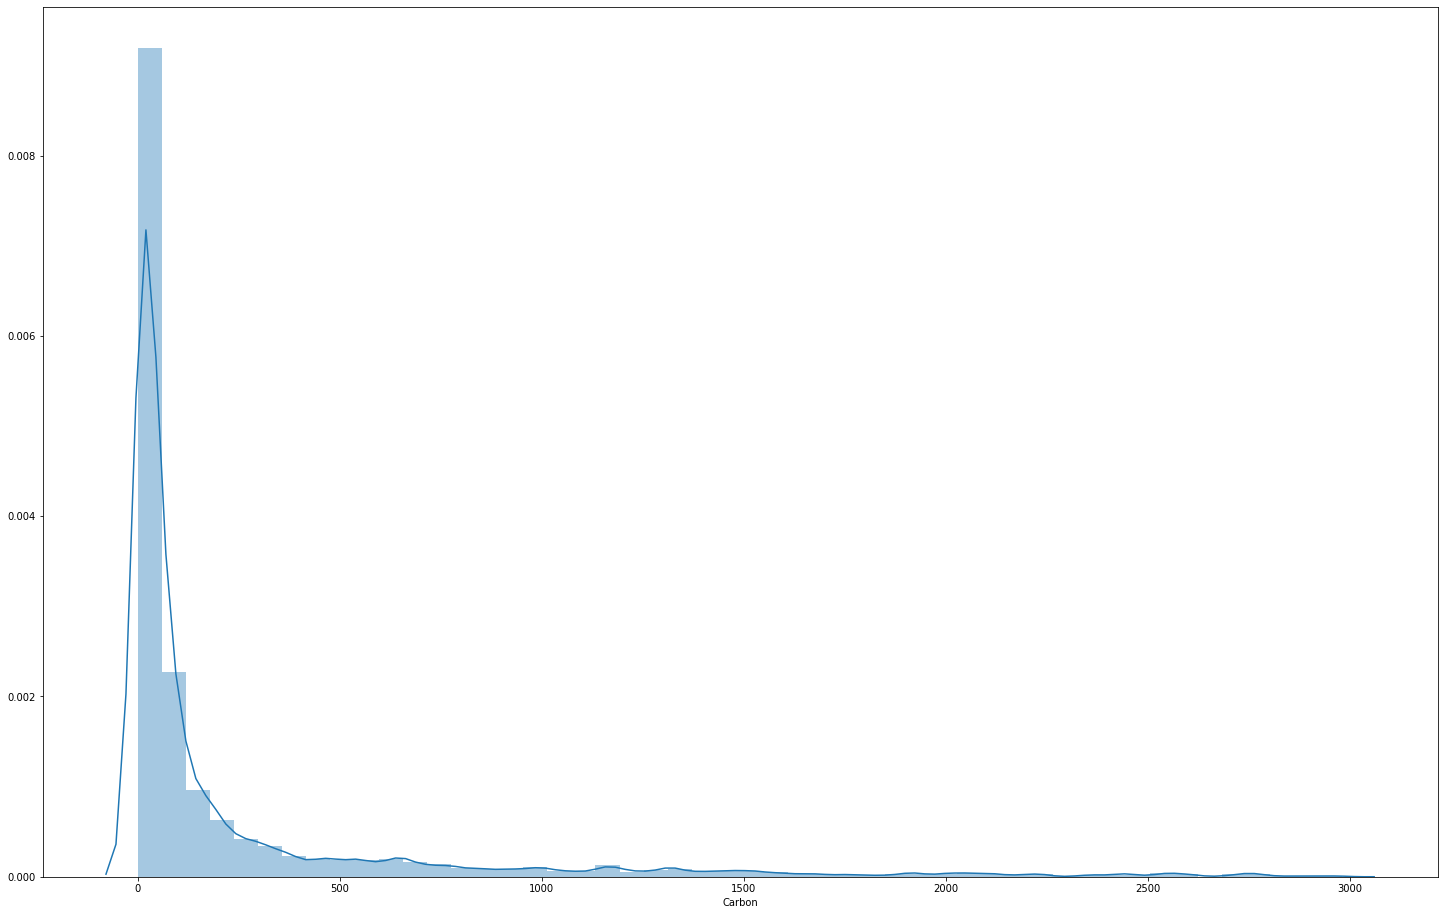

In [194]:
plt.figure(figsize=(25,16))
sns.distplot(df['Carbon'])

In [226]:
sectors = df['GICS_Sector'].unique()
# for sector in sectors: 
#     sector_df = df[df['GICS_Sector'] == sector]
#     plt.figure(figsize=(16,12))
#     plt.title(sector)
#     sns.distplot(sector_df.Carbon)
#     plt.show()

In [217]:
df['Carbon'].value_counts()

539.281077     4
243.967894     2
93.482355      2
8.823529       2
994.297919     1
              ..
2.034823       1
1392.428681    1
9.117140       1
36.581856      1
12.000000      1
Name: Carbon, Length: 3781, dtype: int64

In [218]:
df['Carbon_ln'] = np.log(df['Carbon'])
df

,Company_Name,Listed,HQ_Country,GICS_Sector,Accounting_Year_End,Reported_Scope_1_tCO2e,Estimated_Scope_1_tCO2e,Scope_1_source,Scope_1_quality_flag,Reported_market-based_Scope_2_tCO2e,Note,Reported_location-based_Scope_2_tCO2e,Estimated_location-based_Scope_2_tCO2e,Location-based_Scope_2_source,Location-based_Scope_2_quality_flag,Scope_2_company_comments,GHG_revenue_intensity_tCO2e/mmUSD,Scope_2_figure_used_for_intensity,amplification.wordsindex,DeAmplification.wordsindex,HE_negativeindex,HE_positiveindex,angerindex,anticipationindex,disgustindex,fearindex,joyindex,sadnessindex,surpriseindex,trustindex,LMnegativeindex,LMpositiveindex,LMuncertaintyindex,BasicNegativeWordsindex,PositivePolarisedindex,NegativePolarisedindex,PowerWordsindex,PrudentialNegativeindex,PrudentialPositiveindex,PrudentialTopNegativeindex,Strategyindex,Financial.termsindex,Regulationindex,Technologyindex,Healthcareindex,Environmentindex,Socialindex,Governanceindex,ESGindex,LMuncertaintyindex.1,Regulationindex.1,Environmentindex.1,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN_lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon,Scope_1_tCO2e,Scope_2_tCO2e,Scope_1_and_2_tCO2e,Consumer_Discretionary,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Telecommunication_Services,Utilities,Carbon_ln
0,Sociedad Comercial del Plata SA,Yes,Argentina,Energy,31/12/2016,0.00,1400.0,Estimated: Gamma GLM,2.0,NaN,NA,0.0,3000.0,Estimated: IEA National Grid Emissions Factor ...,3.0,NaN,26.03,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,arp290071462,0.023033,0.023079,0.033899,0.021700,0.178446,26.030882,1400.00,3000.0,4400.00,0,0,1,0,0,0,0,0,0,0,0,3.259284
1,Banco de Galicia y Buenos Aires S.A.,Yes,Argentina,Financials,31/12/2016,933.37,0.0,Reported: CDP (Not Reviewed),NaN,NaN,NA,27626.0,0.0,Reported: CDP (Not Reviewed),NaN,NaN,7.97,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,7.968841,933.37,27626.0,28559.37,0,0,0,1,0,0,0,0,0,0,0,2.075539
2,YPF SA,Yes,Argentina,Energy,31/12/2016,0.00,12000000.0,"Estimated: Oil & Gas Extraction, O&G Refining",6.0,NaN,NA,0.0,1200000.0,"Estimated: Oil & Gas Extraction, O&G Refining",6.0,NaN,926.11,Location-based,48,84,165,110,102,123,221,87,69,86,102,72,89,62,75,98,73,98,94,55,89,170,0,98,111,14,0,87,26,130,90,0.23,0.12,0.23,0.07,0.13,0.27,arp9897x1319,0.024063,0.021263,0.030650,0.029235,0.064662,926.111720,12000000.00,1200000.0,13200000.00,0,0,1,0,0,0,0,0,0,0,0,6.830995
3,Australia Post,Yes,Australia,Industrials,30/06/2016,119338.00,0.0,Reported: CDP (Not Reviewed),NaN,NaN,NA,169447.0,0.0,Reported: CDP (Not Reviewed),NaN,Total scope 2 emissions have been calculated u...,59.91,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,0,NaN,NaN,NaN,NaN,0.000000,59.908367,119338.00,169447.0,288785.00,0,0,0,0,0,1,0,0,0,0,0,4.092816
5,Aristocrat Leisure,Yes,Australia,Consumer Discretionary,29/09/2016,0.00,21000.0,Estimated: Gamma GLM,3.0,NaN,NA,0.0,54000.0,Estimated: IEA National Grid Emissions Factor ...,2.0,NaN,47.82,Location-based,114,35,20,143,135,98,76,99,112,64,89,94,73,119,70,71,113,71,87,86,94,0,316,99,75,266,0,65,"1,375",70,451,0.26,0.24,0.00,0.15,0.01,0.14,au000000all7,0.019772,0.013992,0.018362,0.019044,0.254386,47.820958,21000.00,54000.0,75000.00,1,0,0,0,0,0,0,0,0,0,0,3.867464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,Zillow Group,Yes,USA,Information Technology,31/12/2016,0.00,1300.0,Estimated: Gamma GLM,5.0,NaN,NA,0.0,7300.0,Estimated: IEA National Grid Emissions Factor ...,5.0,NaN,10.16,Location-based,0,0,0,0,

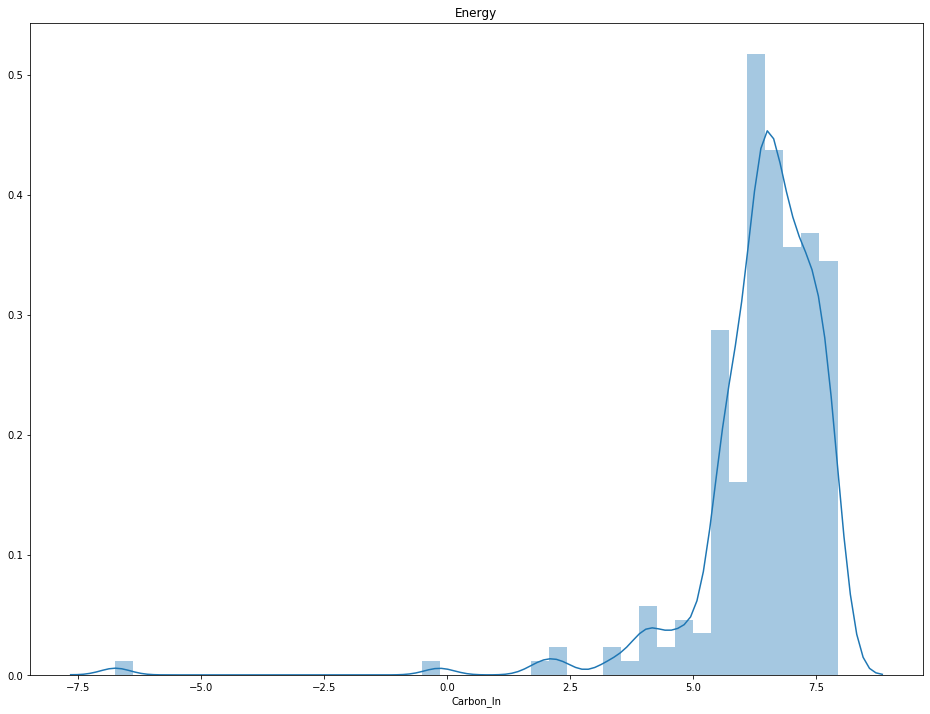

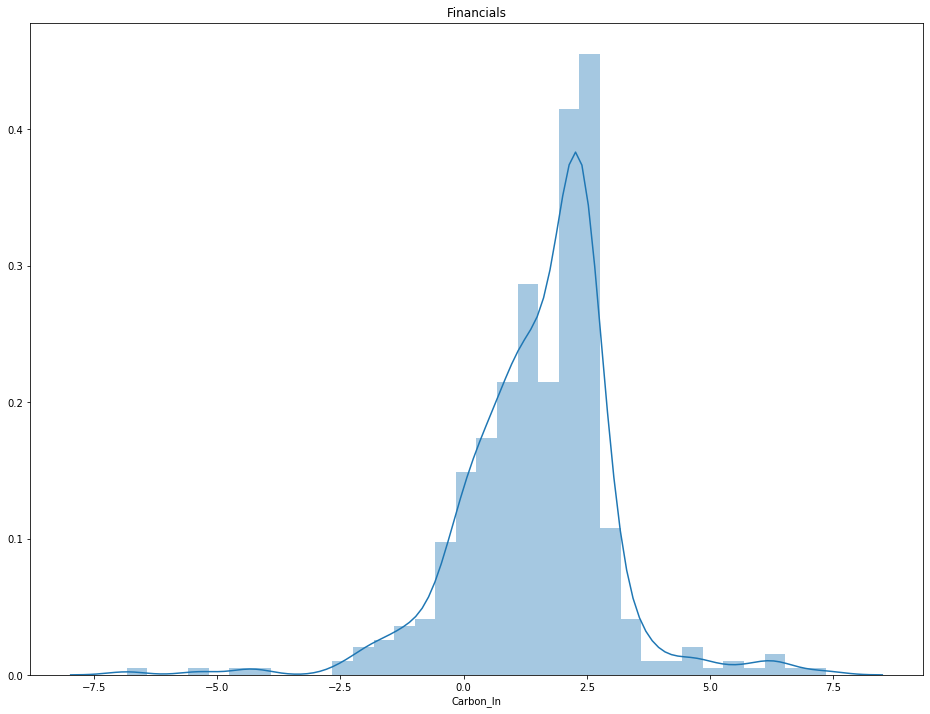

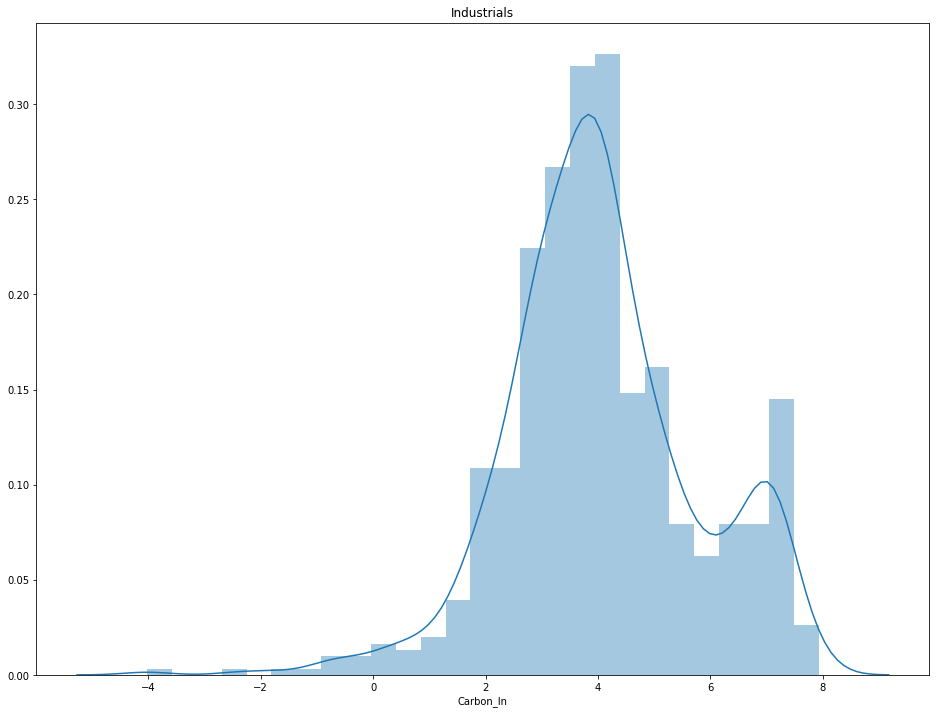

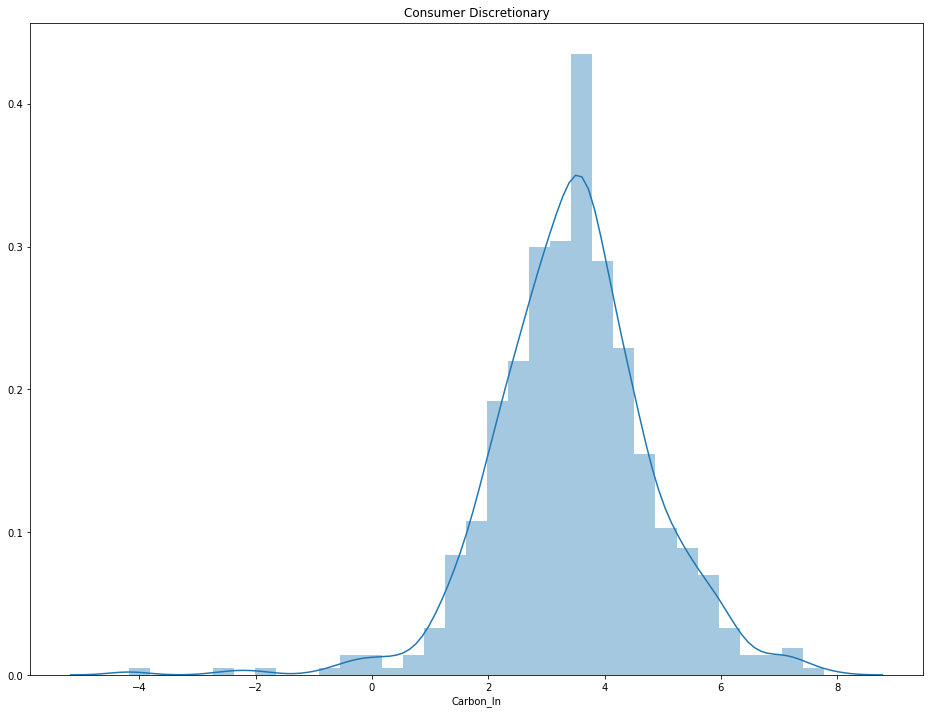

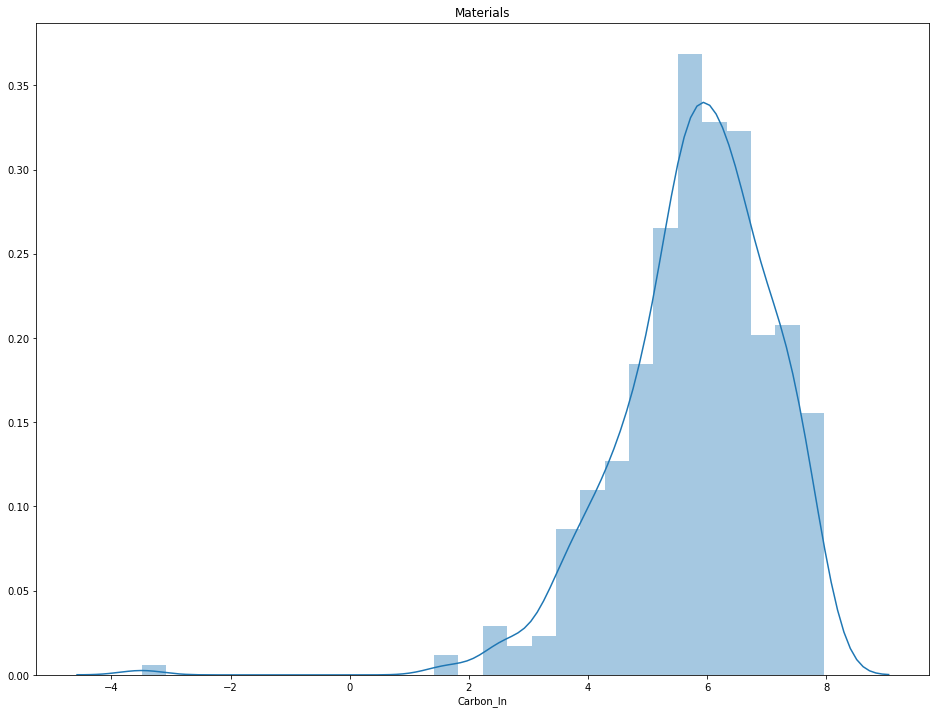

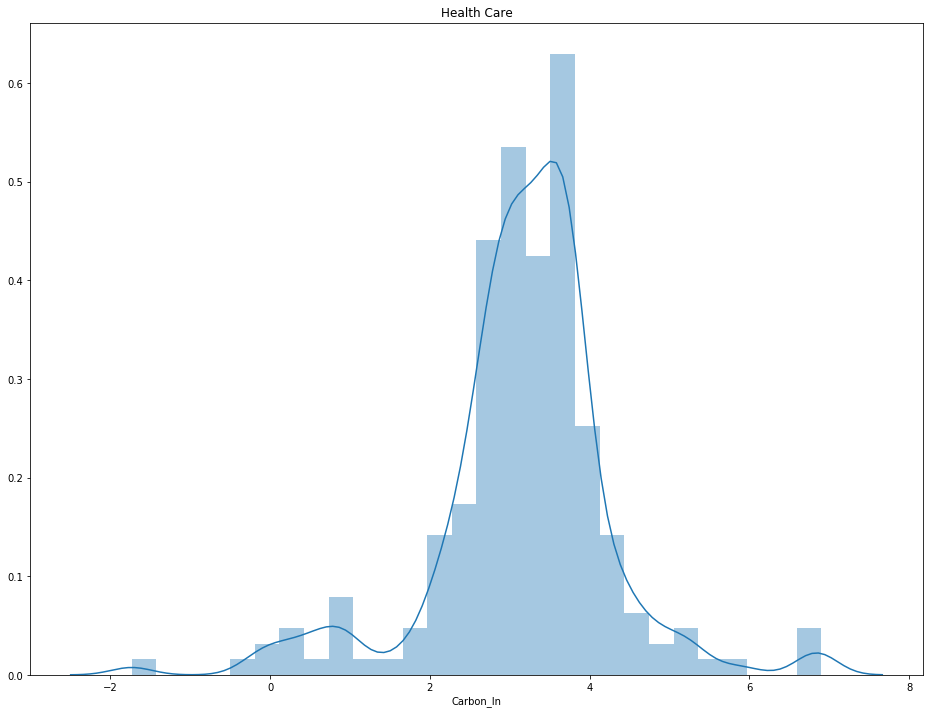

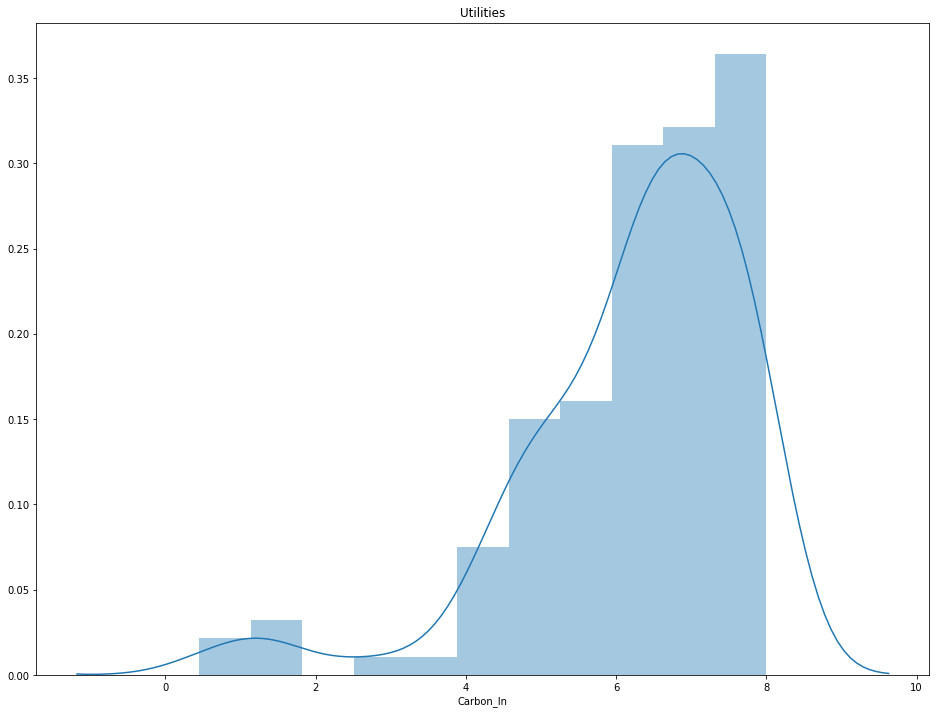

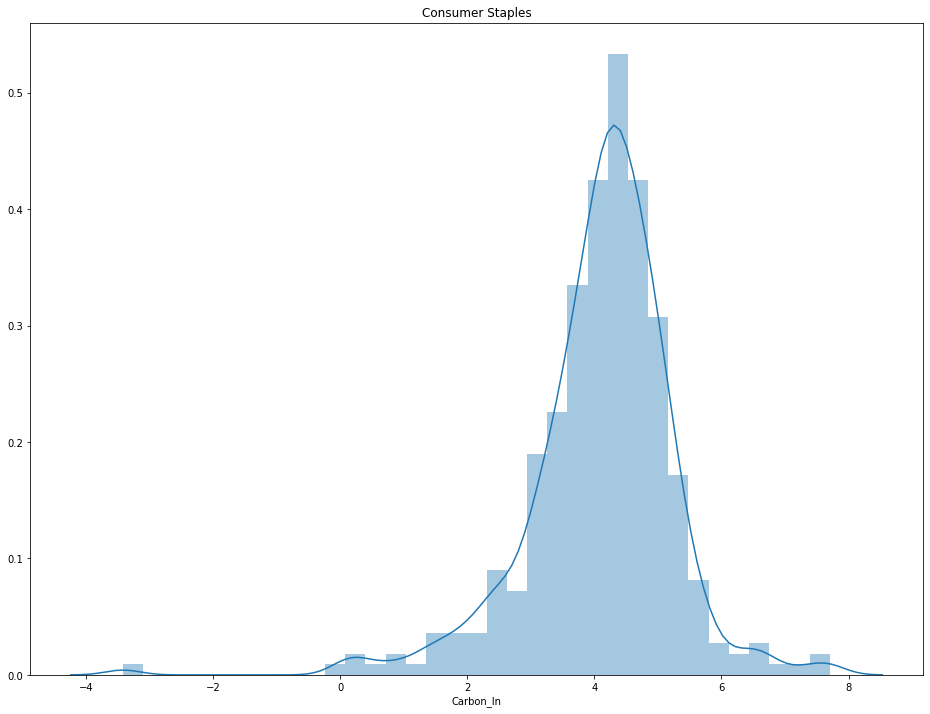

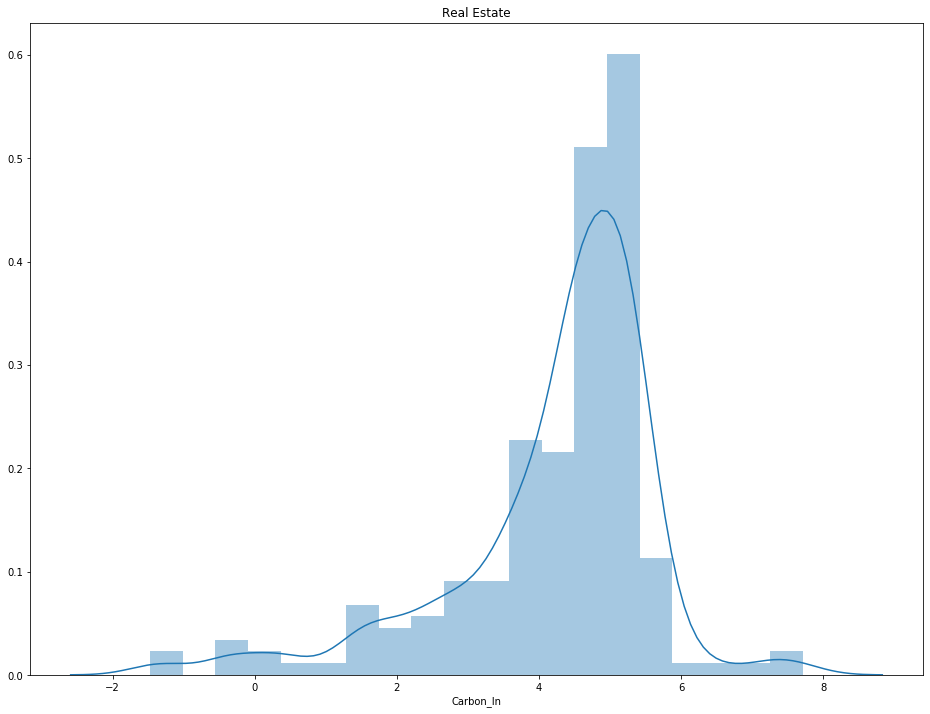

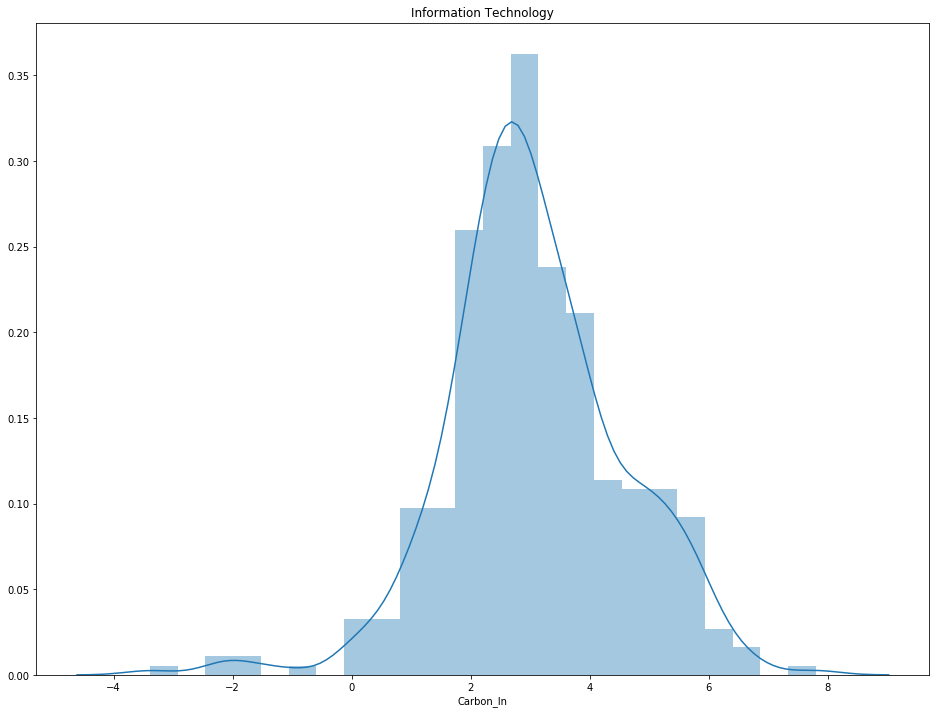

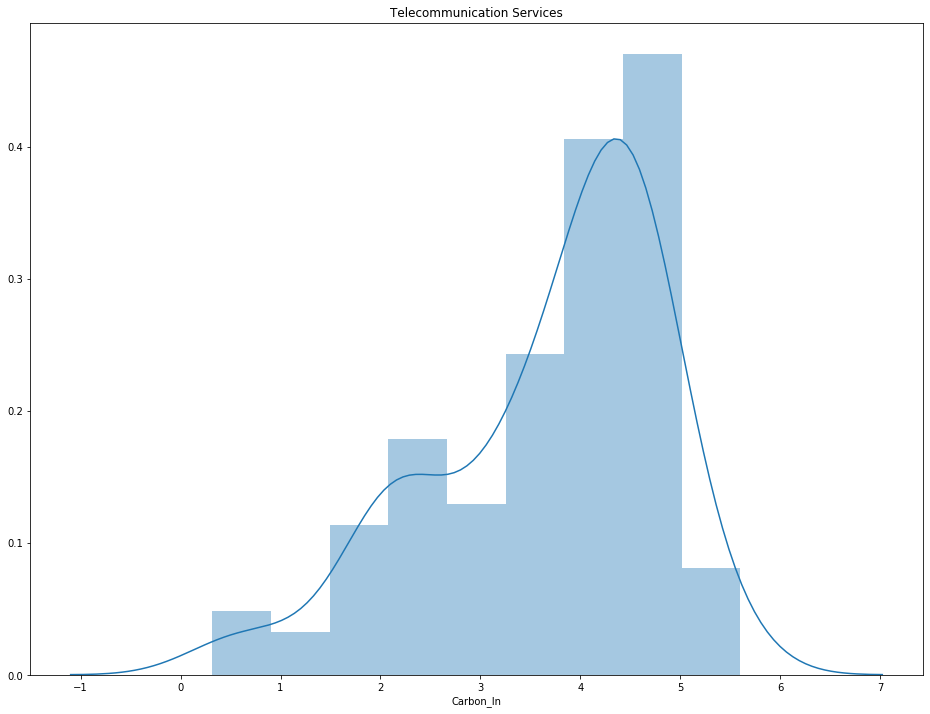

In [227]:
sectors = df['GICS_Sector'].unique()
for sector in sectors: 
    sector_df = df[df['GICS_Sector'] == sector]
    plt.figure(figsize=(16,12))
    plt.title(sector)
    sns.distplot(sector_df.Carbon_ln)
    plt.show()

In [212]:
df['Carbon_ln'].max()

8.000388412072448

In [196]:
x1 = df[['HE_positiveindex', 'Energy', 'Consumer_Discretionary', 'Industrials', 'Materials',
       'Consumer_Staples', 'Financials', 'Utilities','Telecommunication_Services', 'Information_Technology', 
        'Health_Care']]
y1 = df['Carbon']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Carbon   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     193.1
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:01:36   Log-Likelihood:                -27964.
No. Observations:                3792   AIC:                         5.595e+04
Df Residuals:                    3780   BIC:                         5.603e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        141.2377     28.075      5.031      0.000      86.194     196.281
HE_positiveindex              -0.1304      0.121     -1.074      0.283      -0.369       0.108
Energy                       808.1167     37.546     21.523      0.000     734.503     881.730
Consumer_Discretionary       -57.9679     32.114     -1.805      0.071    -120.931       4.995
Industrials                   85.3193     31.565      2.703      0.007      23.433     147.205
Materials                    462.2399     33.625     13.747      0.000     396.314     528.165
Consumer_Staples             -27.9798     34.761     -0.805      0.421     -96.131      40.172
Financials                  -117.0405     33.172     -3.528      0.000    -182.077     -52.004
Utilities                    844.7196     43.326     19.497      0.000     759.775     929.664
Telecommunication_Services   -72.8066     46.948     -1.551      0.121    -164.852      19.239
Information_Technology       -73.1583     34.001     -2.152      0.031    -139.821      -6.495
Health_Care                  -88.1091     38.786     -2.272      0.023    -164.152     -12.066
==============================================================================
Omnibus:                     2064.943   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18744.082
Skew:                           2.453   Prob(JB):                         0.00
Kurtosis:                      12.724   Cond. No.                         943.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
x1 = df[['HE_positiveindex', 'angerindex']]
y1 = df['Carbon']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Carbon   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     36.67
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           1.69e-16
Time:                        18:01:36   Log-Likelihood:                -28773.
No. Observations:                3792   AIC:                         5.755e+04
Df Residuals:                    3789   BIC:                         5.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              245.7495      9.334     26.330      0.000     227.450     264.049
HE_positiveindex    -2.2992      0.282     -8.146      0.000      -2.853      -1.746
angerindex           2.4208      0.291      8.309      0.000       1.850       2.992
==============================================================================
Omnibus:                     2371.476   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20278.966
Skew:                           2.995   Prob(JB):                         0.00
Kurtosis:                      12.616   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
x1 = df[['HE_positiveindex', 'Energy', 'Industrials', 'Materials', 'Utilities', 'Real_Estate']]
y1 = df['Carbon']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Carbon   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     351.3
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:01:36   Log-Likelihood:                -27970.
No. Observations:                3792   AIC:                         5.595e+04
Df Residuals:                    3785   BIC:                         5.600e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               69.3908      9.505      7.301      0.000      50.756      88.026
HE_positiveindex    -0.1526      0.121     -1.258      0.208      -0.390       0.085
Energy             880.7394     26.501     33.234      0.000     828.781     932.697
Industrials        157.8591     17.009      9.281      0.000     124.511     191.207
Materials          534.7305     20.605     25.952      0.000     494.333     575.128
Utilities          917.2619     34.230     26.797      0.000     850.150     984.373
Real_Estate         72.4255     29.187      2.481      0.013      15.201     129.650
==============================================================================
Omnibus:                     2061.993   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18640.806
Skew:                           2.451   Prob(JB):                         0.00
Kurtosis:                      12.693   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
hypotheses = '(Energy = Industrials = Materials = Utilities = Real_Estate)'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[266.48071978]]), p=4.864575910957404e-202, df_denom=3.78e+03, df_num=4>


In [224]:
formula = 'Carbon ~ Energy + Consumer_Discretionary + Industrials + Materials + Consumer_Staples + Financials + Utilities + Information_Technology + Health_Care + Real_Estate'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                              sum_sq      df           F        PR(>F)
Energy                  5.655679e+07     1.0  378.067678  2.460365e-80
Consumer_Discretionary  2.335931e+04     1.0    0.156151  6.927475e-01
Industrials             2.320413e+06     1.0   15.511368  8.349115e-05
Materials               2.422634e+07     1.0  161.946883  2.347516e-36
Consumer_Staples        1.686388e+05     1.0    1.127307  2.884183e-01
Financials              1.688803e+05     1.0    1.128921  2.880735e-01
Utilities               5.001090e+07     1.0  334.310058  1.253556e-71
Information_Technology  8.502997e+00     1.0    0.000057  9.939850e-01
Health_Care             1.662272e+04     1.0    0.111119  7.388927e-01
Real_Estate             3.785011e+05     1.0    2.530183  1.117710e-01
Residual                5.648683e+08  3776.0         NaN           NaN


### CHECK TO SEE IT STATS USES CONSTANT

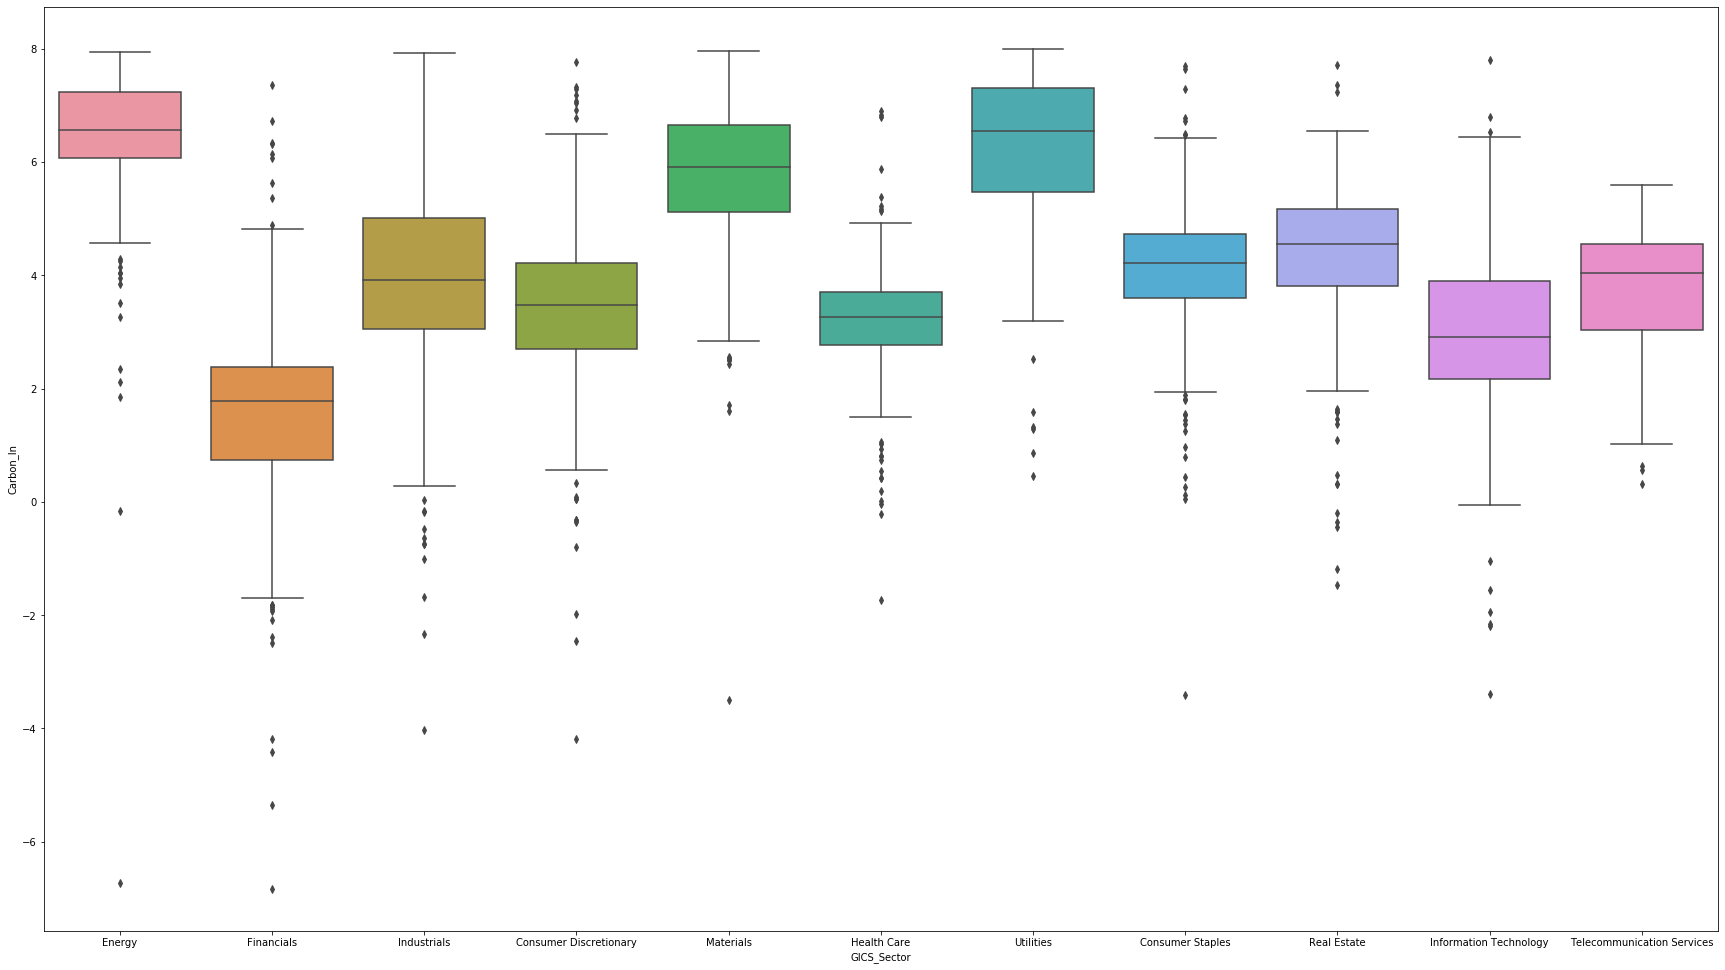

In [225]:
plt.figure(figsize=(30,17))
sns.boxplot(x = df["GICS_Sector"], y = df["Carbon_ln"])

In [223]:
formula = 'Carbon_ln ~ Consumer_Discretionary + Consumer_Staples + Financials + Information_Technology + Health_Care + Real_Estate'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=1)
print(table)

                            df       sum_sq      mean_sq            F  \
Consumer_Discretionary     1.0   154.080593   154.080593    61.730564   
Consumer_Staples           1.0     3.068577     3.068577     1.229389   
Financials                 1.0  3402.096196  3402.096196  1363.009526   
Information_Technology     1.0   967.386045   967.386045   387.571755   
Health_Care                1.0   582.197960   582.197960   233.250714   
Real_Estate                1.0   112.493102   112.493102    45.069028   
Residual                3780.0  9434.947723     2.496018          NaN   

                               PR(>F)  
Consumer_Discretionary   5.094091e-15  
Consumer_Staples         2.675964e-01  
Financials              4.570431e-255  
Information_Technology   3.223199e-82  
Health_Care              3.807775e-51  
Real_Estate              2.186080e-11  
Residual                          NaN  
